In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# analyze CIFAR-100

In [2]:

run_iter = np.arange(10)

all_no_meta = []
all_meta_1 = []
all_meta_2 = []
all_meta_3 = []
all_meta_4 = []
for itr in run_iter:
    res_no_meta_mnist = pickle.load(open("results/cifar_100_" + str(itr) + ".p", "rb"))
    values_no_meta = res_no_meta_mnist["all"]["values"]
    init = res_no_meta_mnist["all"]["init"]["Y"]
    values_no_meta = list(init) + values_no_meta
    values_no_meta_acc = np.maximum.accumulate(values_no_meta)
    all_no_meta.append(values_no_meta_acc)

    ###### RM-GP-UCB
    res_meta_mnist = pickle.load(open("results/meta_cifar_100_" + str(itr) + "_lr_1_eps_07_min_decay_07_tau_1.p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_1.append(values_meta_acc)

    ###### TAF
    res_meta_mnist = pickle.load(open("results/cifar_100_taf_rho_05_" + str(itr) + ".p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_2.append(values_meta_acc)
    
    ###### RGPE
    res_meta_mnist = pickle.load(open("results/cifar_100_rgpe_S_500_" + str(itr) + ".p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_3.append(values_meta_acc)
    
    ###### RM-GP-TS
    res_meta_mnist = pickle.load(open("results/meta_cifar_100_" + str(itr) + ".p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_4.append(values_meta_acc)
    
all_no_meta_np = np.mean(1.0 - np.array(all_no_meta), axis=0)
all_meta_1_np = np.mean(1.0 - np.array(all_meta_1), axis=0)
all_meta_2_np = np.mean(1.0 - np.array(all_meta_2), axis=0)
all_meta_3_np = np.mean(1.0 - np.array(all_meta_3), axis=0)
all_meta_4_np = np.mean(1.0 - np.array(all_meta_4), axis=0)

all_no_meta_np_stderr = np.std(1.0 - np.array(all_no_meta), axis=0) / np.sqrt(len(run_iter))
all_meta_1_np_stderr = np.std(1.0 - np.array(all_meta_1), axis=0) / np.sqrt(len(run_iter))
all_meta_2_np_stderr = np.std(1.0 - np.array(all_meta_2), axis=0) / np.sqrt(len(run_iter))
all_meta_3_np_stderr = np.std(1.0 - np.array(all_meta_3), axis=0) / np.sqrt(len(run_iter))
all_meta_4_np_stderr = np.std(1.0 - np.array(all_meta_4), axis=0) / np.sqrt(len(run_iter))



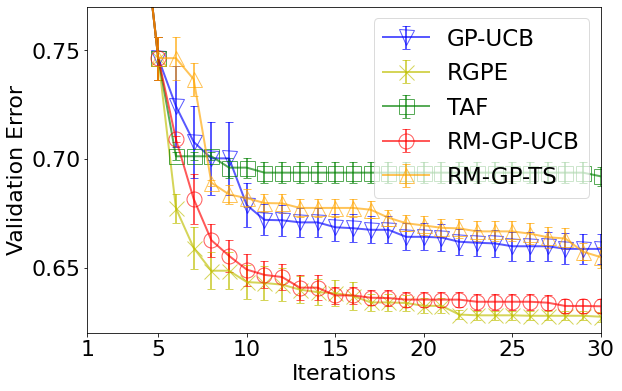

In [3]:


lw = 2.0
marker_size = 15
trans = 0.65
capsize = 4
plt.rc('font', size=22)

plt.figure(figsize=(9.2, 6))
inds = np.arange(1, 31)

run_len = 30

plt.errorbar(inds[:run_len], all_no_meta_np[:run_len], all_no_meta_np_stderr[:run_len], color="b", linewidth=lw, marker="v", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_3_np[:run_len], all_meta_3_np_stderr[:run_len], color="y", linewidth=lw, marker="x", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_2_np[:run_len], all_meta_2_np_stderr[:run_len], color="g", linewidth=lw, marker="s", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_1_np[:run_len], all_meta_1_np_stderr[:run_len], color="r", linewidth=lw, marker="o", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_4_np[:run_len], all_meta_4_np_stderr[:run_len], color="orange", linewidth=lw, marker="^", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')

plt.legend(("GP-UCB", "RGPE", "TAF", "RM-GP-UCB", "RM-GP-TS"), prop={'size':23}, loc='best', framealpha=0.7)

plt.ylabel("Validation Error")
plt.xlabel("Iterations")

# prop={'size': 13}

axes = plt.gca()
axes.set_xlim([1, 30])
axes.set_ylim([0.62, 0.77])
plt.yticks([0.65, 0.70, 0.75])
plt.xticks([1, 5, 10, 15, 20, 25, 30])

plt.show()


# Analyze CIFAR-10

In [4]:

run_iter = np.arange(10)

all_no_meta = []
all_meta_1 = []
all_meta_2 = []
all_meta_3 = []
all_meta_4 = []
for itr in run_iter:
    res_no_meta_mnist = pickle.load(open("results/cifar_10_" + str(itr) + ".p", "rb"))
    values_no_meta = res_no_meta_mnist["all"]["values"]
    init = res_no_meta_mnist["all"]["init"]["Y"]
    values_no_meta = list(init) + values_no_meta
    values_no_meta_acc = np.maximum.accumulate(values_no_meta)
    all_no_meta.append(values_no_meta_acc)

    ###### RM-GP-UCB
    res_meta_mnist = pickle.load(open("results/meta_cifar_10_" + str(itr) + "_lr_1_eps_07_min_decay_07_tau_1.p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_1.append(values_meta_acc)

    ###### TAF
    res_meta_mnist = pickle.load(open("results/cifar_10_taf_rho_05_" + str(itr) + ".p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_2.append(values_meta_acc)
    
    ###### RGPE
    res_meta_mnist = pickle.load(open("results/cifar_10_rgpe_S_500_" + str(itr) + ".p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_3.append(values_meta_acc)    
    
    ###### RM-GP-TS
    res_meta_mnist = pickle.load(open("results/meta_cifar_10_" + str(itr) + ".p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_4.append(values_meta_acc)
    
all_no_meta_np = np.mean(1.0 - np.array(all_no_meta), axis=0)
all_meta_1_np = np.mean(1.0 - np.array(all_meta_1), axis=0)
all_meta_2_np = np.mean(1.0 - np.array(all_meta_2), axis=0)
all_meta_3_np = np.mean(1.0 - np.array(all_meta_3), axis=0)
all_meta_4_np = np.mean(1.0 - np.array(all_meta_4), axis=0)

all_no_meta_np_stderr = np.std(1.0 - np.array(all_no_meta), axis=0) / np.sqrt(len(run_iter))
all_meta_1_np_stderr = np.std(1.0 - np.array(all_meta_1), axis=0) / np.sqrt(len(run_iter))
all_meta_2_np_stderr = np.std(1.0 - np.array(all_meta_2), axis=0) / np.sqrt(len(run_iter))
all_meta_3_np_stderr = np.std(1.0 - np.array(all_meta_3), axis=0) / np.sqrt(len(run_iter))
all_meta_4_np_stderr = np.std(1.0 - np.array(all_meta_4), axis=0) / np.sqrt(len(run_iter))


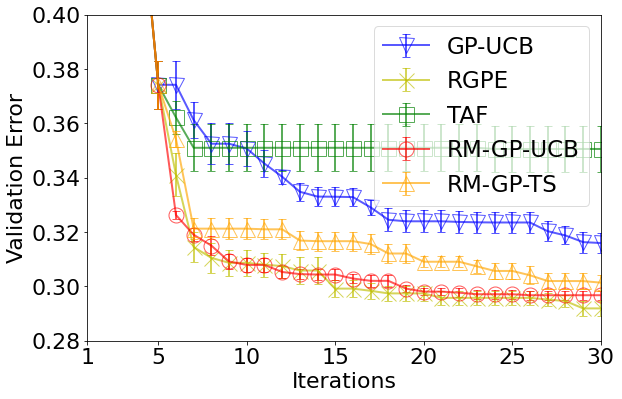

In [5]:

lw = 2.0
marker_size = 15
trans = 0.65
capsize = 4
plt.rc('font', size=22)

plt.figure(figsize=(9.2, 6))
inds = np.arange(1, 31)

run_len = 30

plt.errorbar(inds[:run_len], all_no_meta_np[:run_len], all_no_meta_np_stderr[:run_len], color="b", linewidth=lw, marker="v", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_3_np[:run_len], all_meta_3_np_stderr[:run_len], color="y", linewidth=lw, marker="x", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_2_np[:run_len], all_meta_2_np_stderr[:run_len], color="g", linewidth=lw, marker="s", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_1_np[:run_len], all_meta_1_np_stderr[:run_len], color="r", linewidth=lw, marker="o", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_4_np[:run_len], all_meta_4_np_stderr[:run_len], color="orange", linewidth=lw, marker="^", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')

plt.legend(("GP-UCB", "RGPE", "TAF", "RM-GP-UCB", "RM-GP-TS"), prop={'size':23}, loc='best', framealpha=0.7)

plt.ylabel("Validation Error")
plt.xlabel("Iterations")

axes = plt.gca()
axes.set_xlim([1, 30])
axes.set_ylim([0.28, 0.4])
plt.xticks([1, 5, 10, 15, 20, 25, 30])

plt.show()


# Analyze MNIST

In [6]:

run_iter = np.arange(10)

all_no_meta = []
all_meta_1 = []
all_meta_2 = []
all_meta_3 = []
all_meta_4 = []

for itr in run_iter:
    res_no_meta_mnist = pickle.load(open("results/mnist_" + str(itr) + ".p", "rb"))
    values_no_meta = res_no_meta_mnist["all"]["values"]
    init = res_no_meta_mnist["all"]["init"]["Y"]
    values_no_meta = list(init) + values_no_meta
    values_no_meta_acc = np.maximum.accumulate(values_no_meta)
    all_no_meta.append(values_no_meta_acc)

    ###### RM-GP-UCB
    res_meta_mnist = pickle.load(open("results/meta_mnist_" + str(itr) + "_lr_1_eps_07_min_decay_07_tau_1.p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_1.append(values_meta_acc)

    ###### TAF
    res_meta_mnist = pickle.load(open("results/mnist_taf_rho_05_" + str(itr) + ".p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_2.append(values_meta_acc)
    
    ###### RGPE
    res_meta_mnist = pickle.load(open("results/mnist_rgpe_S_500_" + str(itr) + ".p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_3.append(values_meta_acc)
    
    ###### RM-GP-TS
    res_meta_mnist = pickle.load(open("results/meta_mnist_" + str(itr) + ".p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_4.append(values_meta_acc)

all_no_meta_np = np.mean(1.0 - np.array(all_no_meta), axis=0)
all_meta_1_np = np.mean(1.0 - np.array(all_meta_1), axis=0)
all_meta_2_np = np.mean(1.0 - np.array(all_meta_2), axis=0)
all_meta_3_np = np.mean(1.0 - np.array(all_meta_3), axis=0)
all_meta_4_np = np.mean(1.0 - np.array(all_meta_4), axis=0)

all_no_meta_np_stderr = np.std(1.0 - np.array(all_no_meta), axis=0) / np.sqrt(len(run_iter))
all_meta_1_np_stderr = np.std(1.0 - np.array(all_meta_1), axis=0) / np.sqrt(len(run_iter))
all_meta_2_np_stderr = np.std(1.0 - np.array(all_meta_2), axis=0) / np.sqrt(len(run_iter))
all_meta_3_np_stderr = np.std(1.0 - np.array(all_meta_3), axis=0) / np.sqrt(len(run_iter))
all_meta_4_np_stderr = np.std(1.0 - np.array(all_meta_4), axis=0) / np.sqrt(len(run_iter))



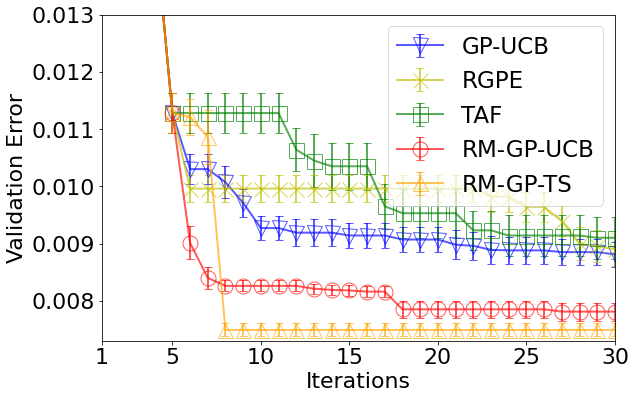

In [8]:

lw = 2.0
marker_size = 15
trans = 0.65
capsize = 4
plt.rc('font', size=22)

plt.figure(figsize=(9.2, 6))
inds = np.arange(1, 31)

run_len = 30

plt.errorbar(inds[:run_len], all_no_meta_np[:run_len], all_no_meta_np_stderr[:run_len], color="b", linewidth=lw, marker="v", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_3_np[:run_len], all_meta_3_np_stderr[:run_len], color="y", linewidth=lw, marker="x", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_2_np[:run_len], all_meta_2_np_stderr[:run_len], color="g", linewidth=lw, marker="s", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_1_np[:run_len], all_meta_1_np_stderr[:run_len], color="r", linewidth=lw, marker="o", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_4_np[:run_len], all_meta_4_np_stderr[:run_len], color="orange", linewidth=lw, marker="^", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')

plt.legend(("GP-UCB", "RGPE", "TAF", "RM-GP-UCB", "RM-GP-TS"), prop={'size':23}, loc='best', framealpha=0.7)

plt.ylabel("Validation Error")
plt.xlabel("Iterations")

axes = plt.gca()
axes.set_xlim([1, 30])
axes.set_ylim([0.0073, 0.013])
plt.xticks([1, 5, 10, 15, 20, 25, 30])

plt.show()


# Analyze SVHN

In [9]:

run_iter = np.arange(10)

all_no_meta = []
all_meta_1 = []
all_meta_2 = []
all_meta_3 = []
all_meta_4 = []
for itr in run_iter:
    res_no_meta_mnist = pickle.load(open("results/svhn_" + str(itr) + ".p", "rb"))
    values_no_meta = res_no_meta_mnist["all"]["values"]
    init = res_no_meta_mnist["all"]["init"]["Y"]
    values_no_meta = list(init) + values_no_meta
    values_no_meta_acc = np.maximum.accumulate(values_no_meta)
    all_no_meta.append(values_no_meta_acc)

    ###### RM-GP-UCB
    res_meta_mnist = pickle.load(open("results/meta_svhn_" + str(itr) + "_lr_1_eps_07_min_decay_07_tau_1.p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_1.append(values_meta_acc)

    ###### TAF
    res_meta_mnist = pickle.load(open("results/svhn_taf_rho_05_" + str(itr) + ".p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_2.append(values_meta_acc)
    
    ###### RGPE
    res_meta_mnist = pickle.load(open("results/svhn_rgpe_S_500_" + str(itr) + ".p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_3.append(values_meta_acc)

    ###### RM-GP-TS
    res_meta_mnist = pickle.load(open("results/meta_svhn_" + str(itr) + ".p", "rb"))
    values_meta = res_meta_mnist["all"]["values"]
    init = res_meta_mnist["all"]["init"]["Y"]
    values_meta = list(init) + values_meta
    values_meta_acc = np.maximum.accumulate(values_meta)
    all_meta_4.append(values_meta_acc)

all_no_meta_np = np.mean(1.0 - np.array(all_no_meta), axis=0)
all_meta_1_np = np.mean(1.0 - np.array(all_meta_1), axis=0)
all_meta_2_np = np.mean(1.0 - np.array(all_meta_2), axis=0)
all_meta_3_np = np.mean(1.0 - np.array(all_meta_3), axis=0)
all_meta_4_np = np.mean(1.0 - np.array(all_meta_4), axis=0)

all_no_meta_np_stderr = np.std(1.0 - np.array(all_no_meta), axis=0) / np.sqrt(len(run_iter))
all_meta_1_np_stderr = np.std(1.0 - np.array(all_meta_1), axis=0) / np.sqrt(len(run_iter))
all_meta_2_np_stderr = np.std(1.0 - np.array(all_meta_2), axis=0) / np.sqrt(len(run_iter))
all_meta_3_np_stderr = np.std(1.0 - np.array(all_meta_3), axis=0) / np.sqrt(len(run_iter))
all_meta_4_np_stderr = np.std(1.0 - np.array(all_meta_4), axis=0) / np.sqrt(len(run_iter))



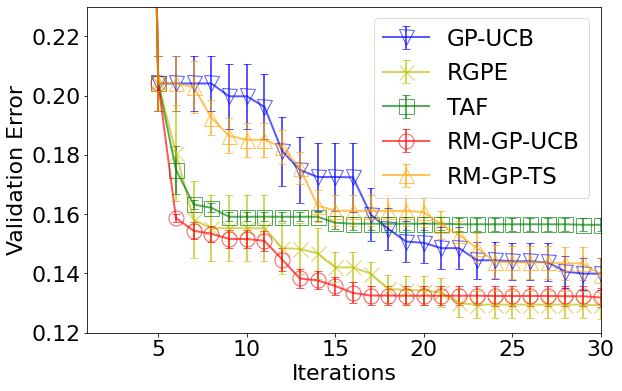

In [11]:

lw = 2.0
marker_size = 15
trans = 0.65
capsize = 4
plt.rc('font', size=22)

plt.figure(figsize=(9.2, 6))
inds = np.arange(1, 31)

run_len = 30

plt.errorbar(inds[:run_len], all_no_meta_np[:run_len], all_no_meta_np_stderr[:run_len], color="b", linewidth=lw, marker="v", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_3_np[:run_len], all_meta_3_np_stderr[:run_len], color="y", linewidth=lw, marker="x", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_2_np[:run_len], all_meta_2_np_stderr[:run_len], color="g", linewidth=lw, marker="s", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_1_np[:run_len], all_meta_1_np_stderr[:run_len], color="r", linewidth=lw, marker="o", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')
plt.errorbar(inds[:run_len], all_meta_4_np[:run_len], all_meta_4_np_stderr[:run_len], color="orange", linewidth=lw, marker="^", markersize=marker_size, alpha=trans, capsize=capsize, markerfacecolor='none')

plt.legend(("GP-UCB", "RGPE", "TAF", "RM-GP-UCB", "RM-GP-TS"), prop={'size':23}, loc='best', framealpha=0.7)

plt.ylabel("Validation Error")
plt.xlabel("Iterations")

axes = plt.gca()
axes.set_xlim([1, 30])
axes.set_ylim([0.12, 0.23])
# plt.xticks([1, 5, 10, 15, 20, 25, 30])

plt.show()
